# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.style as style 
style.use('dark_background')
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = 100 

In [2]:
# look at the cleaned data
df = pd.read_csv('hotel_cleaned.csv')

# Questions to Ask
- Which types of hotel receive more cancellations, city hotels or resort hotels?
- Where do the guests come from?
- What are the most popular room types? And what is the percentage of guests who actually got their desired room types?
- When do people tend to travel more?
- How much do guests pay for a room per night? Comparing two hotels, and differents months.
- How long do guest usually stay at hotels?
- What's the relationship between market segments and cancellation rate?
- Is longer the lead time the more likely guests are going to cancel?
- What is the relationship between number of previous cancellations and the target variable?
- (check all other categorical and numerical features' relationships with the target)

# Categorical Features

**Do city hotels or resort hotels receive more cancellations?**

In [3]:
# assign city hotels and resort hotels
city_hotel = df[df['hotel']=='City Hotel']
resort_hotel = df[df['hotel']=='Resort Hotel']

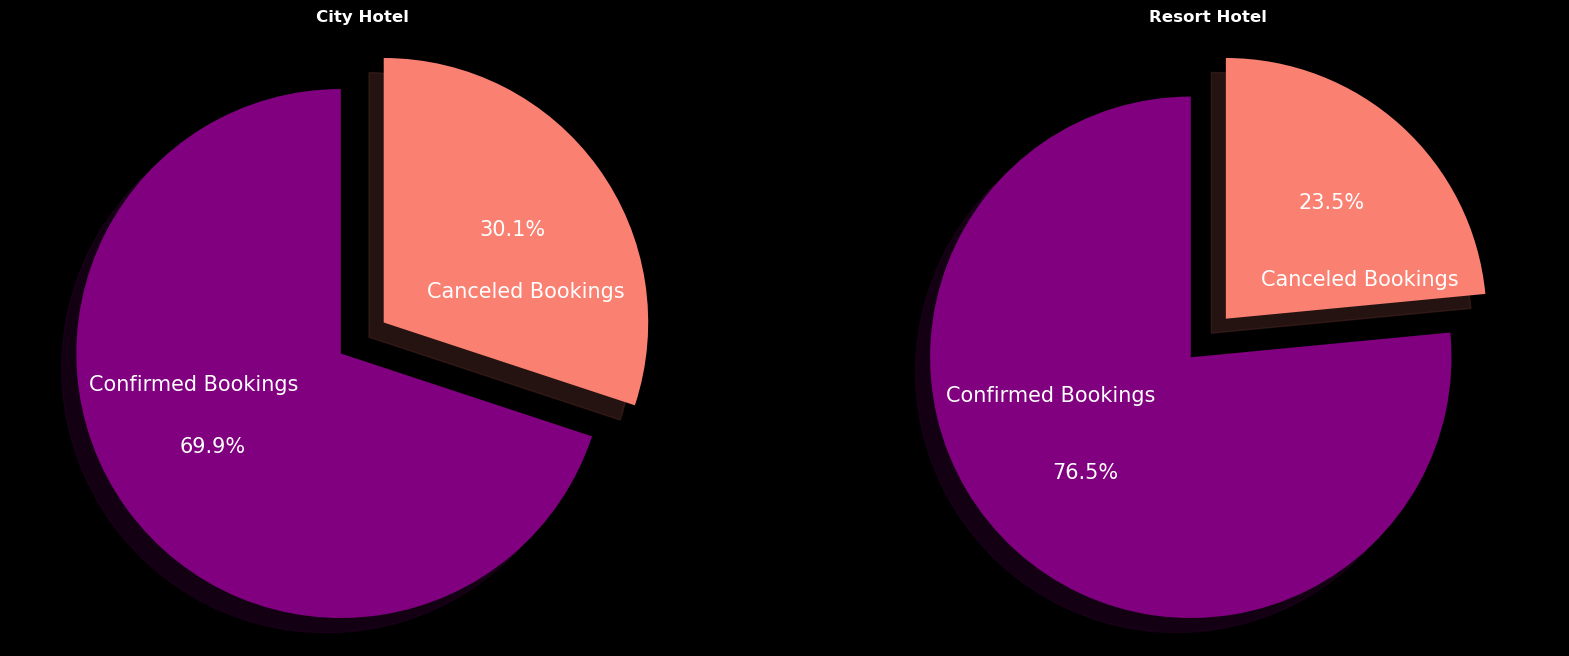

In [4]:
hotels = [city_hotel,resort_hotel]
titles = ['City Hotel','Resort Hotel']

plt.subplots(1,2,figsize=(20,8))
for i, hotel in enumerate(hotels):
    
    plt.subplot(1,2,i+1)
    labels = ['Confirmed Bookings',  'Canceled Bookings']
    myexplode = [0.1, 0]
    colors = ['purple', 'salmon']

    plt.pie(hotel['is_canceled'].value_counts(), 
            autopct='%1.1f%%',
            shadow=True, 
            startangle=90, 
            explode = myexplode, 
            textprops={'color':"white", 'fontsize':15}, 
            labels=labels,
            labeldistance=0.2,
            radius=0.5,
            colors=colors)
    plt.axis('equal')
    plt.title(titles[i],fontweight='bold')
    
plt.show()

People who plans to stay at city hotels more likely to cancel their bookings compared to those who plan to stay at resort hotels.

**Where do the guests come from?**

In [5]:
# top 20 countries with the most bookings
country = pd.DataFrame(df['country'].value_counts().head(20))
country.rename(columns={'country':'Number of Bookings'},inplace=True)
country['Percentage of Bookings'] = round((country['Number of Bookings']/country['Number of Bookings'].sum())*100,2)
country

,Number of Bookings,Percentage of Bookings
PRT,27758,34.11
GBR,10408,12.79
FRA,8798,10.81
ESP,7230,8.88
DEU,5372,6.60
ITA,3052,3.75
IRL,3011,3.70
BEL,2065,2.54
BRA,1983,2.44
CHN,1908,2.34


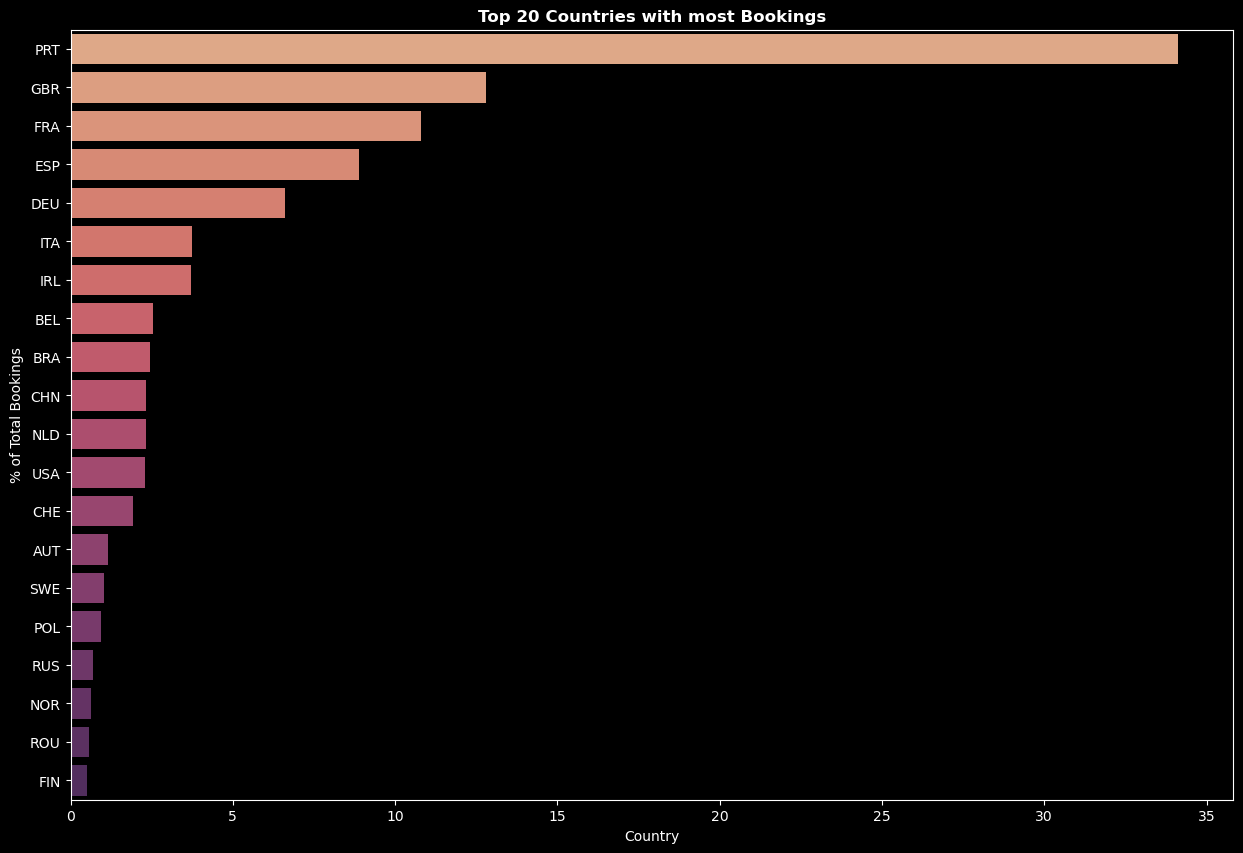

In [6]:
plt.figure(figsize=(15,10))
sns.barplot(country,
            y=country.index,
            x='Percentage of Bookings',
            palette='flare',
            orient='h')
plt.xlabel('Country')
plt.ylabel('% of Total Bookings')
plt.title('Top 20 Countries with most Bookings',fontweight='bold')
plt.show()

There are 34% of the total bookings were made by guests from Portugal, followed by Great Bratin, France, Spain and Germany.

In [7]:
# cancellation rates of top 20 countries
cancel_rate_country = round(df.groupby(['country','is_canceled'])['country'].count()/df.groupby(['country'])['country'].count()*100,2).unstack()
cancel_rate_country['Number of Bookings'] = df['country'].value_counts()
cancel_rate_country = cancel_rate_country.sort_values('Number of Bookings',ascending=False).head(10).sort_values(1,ascending=False)
cancel_rate_country

is_canceled,0,1,Number of Bookings
country,,,
BRA,63.64,36.36,1983
PRT,64.70,35.30,27758
ITA,64.94,35.06,3052
CHN,67.71,32.29,1908
ESP,74.30,25.70,7230
IRL,77.88,22.12,3011
BEL,80.24,19.76,2065
FRA,80.37,19.63,8798
DEU,80.45,19.55,5372


In [8]:
fig = px.bar(cancel_rate_country,
             x=cancel_rate_country.index, 
             y=[0, 1],
             labels={'variable':'Canceled','value':'Cancellation Rate (%)'},
             color_discrete_sequence=['purple', 'salmon'],
             title='Cancellation Rate of Top 20 Countries',
             template='plotly_dark')

fig.update_layout(xaxis_title='Cancellation Rate', 
                  yaxis_title='Country',
                  width=600,
                  height=600)

fig.show()

Among the 10 countries with most bookings, Brazil, Portugal, Italy, and China have the highest cancellations. There are more canceled bookings than the non-canceled bookings.

**What are the most popular room types? And what is the percentage of guests who actually got their desired room types? What's the relatonship between room types and cancellation rate?**

In [9]:
# check the number of reserved room types
reserved_room_types = df.groupby('reserved_room_type')['reserved_room_type'].count().sort_values(ascending=False)
reserved_room_types

reserved_room_type
A    56425
D    17375
E     6035
F     2818
G     2049
C      914
B      791
H      596
L        6
Name: reserved_room_type, dtype: int64

In [10]:
# check the number of assigned room types
assigned_room_types = df.groupby('assigned_room_type')['assigned_room_type'].count().sort_values(ascending=False)
assigned_room_types

assigned_room_type
A    46246
D    22416
E     7190
F     3627
G     2494
C     2160
B     1632
H      705
I      353
K      185
L        1
Name: assigned_room_type, dtype: int64

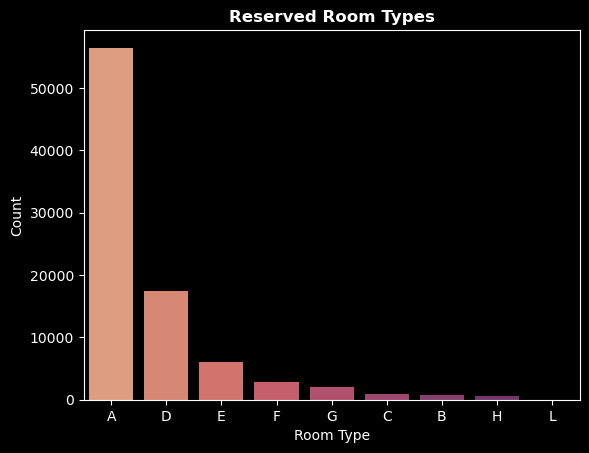

In [11]:
# visualize reserved_room_types
plt.figure()
sns.barplot(x=reserved_room_types.index,
            y=reserved_room_types.values,
            palette='flare')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Reserved Room Types',fontweight='bold')
plt.show()

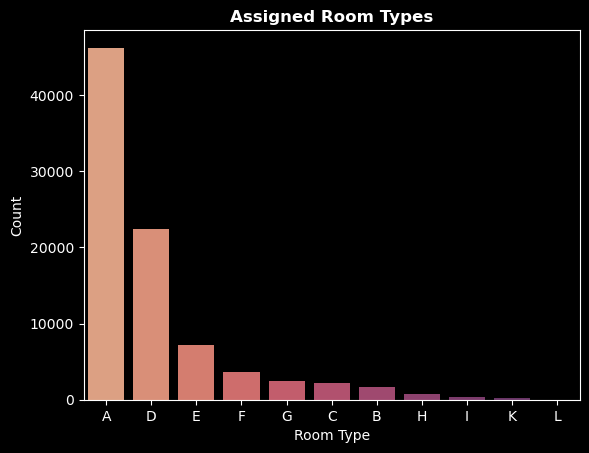

In [12]:
# visualize assigned_room_types
plt.figure()
sns.barplot(x=assigned_room_types.index,
            y=assigned_room_types.values,
            palette='flare')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Assigned Room Types',fontweight='bold')
plt.show()

In [13]:
# reserved room types and cancellation
reserved_room_cancel = round(df.groupby(['reserved_room_type','is_canceled'])['is_canceled'].count()/df.groupby(['reserved_room_type'])['reserved_room_type'].count()*100,2).unstack().sort_values(1,ascending=False)
reserved_room_cancel

is_canceled,0,1
reserved_room_type,,
H,59.23,40.77
G,64.08,35.92
L,66.67,33.33
C,67.61,32.39
F,69.80,30.20
D,69.87,30.13
B,69.91,30.09
E,72.73,27.27
A,73.98,26.02


In [14]:
fig = px.bar(reserved_room_cancel,
             x=reserved_room_cancel.index,
             y=[0, 1],
             color_discrete_sequence=['purple', 'salmon'],
             labels={'variable': 'Canceled', 'value': 'Cancellation Rate (%)'},
             title='Cancellation Rates and Reserved Room Types',
             template = 'plotly_dark')

# fig.update_xaxes(type='category')
fig.update_layout(xaxis_title='Room Type', 
                  yaxis_title='Cancellation Rate',
                  width=600, 
                  height=600)
fig.show()

Type A as the most desired room type has the lowest cancellation rate. Type H has the most cancellations, but the number of data points with this particular room type is small, could biased. I will look at assigned room types and their relationship before making a decision.

In [15]:
# assigned room types and cancellation
assigned_room_cancel = round(df.groupby(['assigned_room_type','is_canceled'])['is_canceled'].count()/df.groupby(['assigned_room_type'])['assigned_room_type'].count()*100,2).unstack().sort_values(1,ascending=False)
assigned_room_cancel

is_canceled,0,1
assigned_room_type,,
L,NaN,100.00
H,64.68,35.32
A,69.35,30.65
G,69.85,30.15
F,75.35,24.65
D,75.77,24.23
E,76.43,23.57
B,80.39,19.61
C,81.71,18.29


In [16]:
fig = px.bar(assigned_room_cancel,
             x=assigned_room_cancel.index,
             y=[0, 1],
             color_discrete_sequence=['purple', 'salmon'],
             labels={'variable': 'Canceled', 'value': 'Cancellation Rate (%)'},
             title='Cancellation Rates and Assigned Room Types',
             template = 'plotly_dark')

# fig.update_xaxes(type='category')
fig.update_layout(xaxis_title='Room Type', 
                  yaxis_title='Cancellation Rate',
                  width=600, 
                  height=600)
fig.show()

Looking at the assigned room types and cancellation rates, even though type L has 100% cancellation, but there is only one data point associated with it, however, type A has the high 30.65% cancellation rate. Note that, some room types very sparse to prove the pattern, but overall there is potential predictive value of this feature.

Now check if there is underlying implicit relation between the two features, that will provide information towards the target.

In [17]:
# assigned = reserved
round(df[df['assigned_room_type']==df['reserved_room_type']]['is_canceled'].value_counts()/len(df[df['assigned_room_type']==df['reserved_room_type']])*100,2)

0    68.52
1    31.48
Name: is_canceled, dtype: float64

In [18]:
# assigned != reserved
round(df[df['assigned_room_type']!=df['reserved_room_type']]['is_canceled'].value_counts()/len(df[df['assigned_room_type']!=df['reserved_room_type']])*100,2)

0    95.25
1     4.75
Name: is_canceled, dtype: float64

The bookings where guests did not get their desired room types have much less cancellation rate, this is suprising. Let's explore these bookings and see if there are any special reasons for that.

In [19]:
# guests who got their reserved room types
right_room = df[df['assigned_room_type']==df['reserved_room_type']]

# guests who got their reserved room types
wrong_room = df[df['assigned_room_type']!=df['reserved_room_type']]

# make a data frame
right_room_df = right_room.mean()
wrong_room_df = wrong_room.mean()

room_df = pd.DataFrame({'Right Room Type': right_room_df,'Wrong Room Type': wrong_room_df})

room_df

,Right Room Type,Wrong Room Type
is_canceled,0.314806,0.047465
lead_time,83.677335,58.053639
arrival_date_year,2016.245490,2016.009647
arrival_date_month,6.470953,6.498804
arrival_date_week_number,26.807203,26.996450
arrival_date_day_of_month,15.840598,15.657174
stays_in_weekend_nights,1.053246,0.726711
stays_in_week_nights,2.727637,2.031643
adults,1.901259,1.785984
children,0.140658,0.096859


Bookings with the right room types:
- have a longer lead timem
- guests tend to stay longer
- guests are less likely to be a repeated guest
- guests have more previous cancellations, and less confirmed bookings
- guests make less booking changes
- almost no required car parking

Looks like these two features have some underlying connection with other feature that may contribute to cancellations, I will keep them for encoding.

**When do people tend to travel more?**

In [20]:
# yearly all bookings
yearly_bookings = df['arrival_date_year'].value_counts().sort_index()
yearly_bookings

2015    13269
2016    42167
2017    31573
Name: arrival_date_year, dtype: int64

In [21]:
# yearly cancellation rate
yearly_cancel_rate = round((df.groupby(['arrival_date_year','is_canceled'])['is_canceled'].count()/df.groupby('arrival_date_year')['arrival_date_year'].count()*100),2).unstack()
yearly_cancel_rate

is_canceled,0,1
arrival_date_year,,
2015,79.67,20.33
2016,73.56,26.44
2017,68.08,31.92


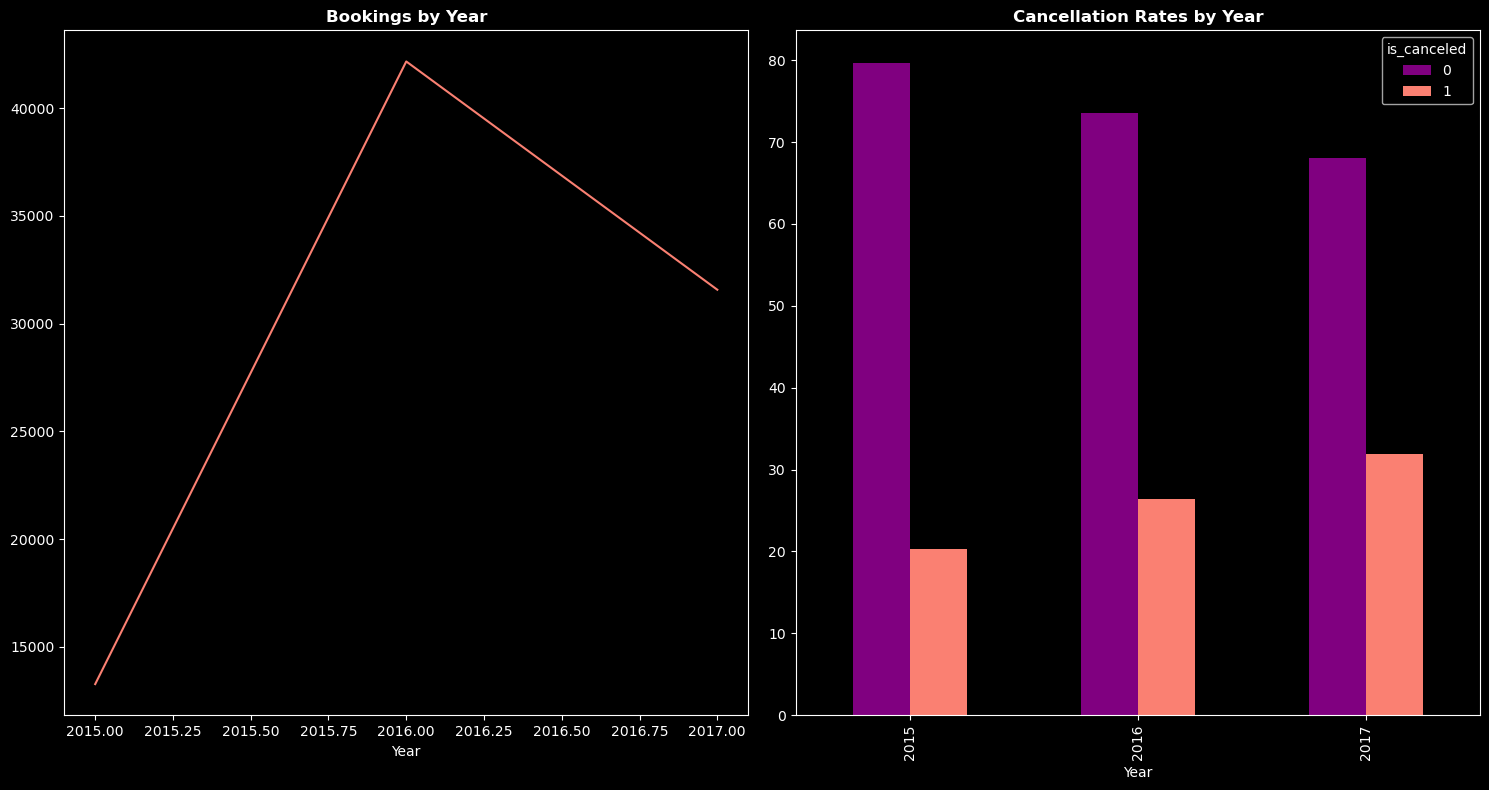

In [22]:
# plot
fig = plt.figure(figsize=(15, 8))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0, 0])
yearly_bookings.plot(kind='line', color='salmon',ax=ax1)
ax1.set_title('Bookings by Year',fontweight='bold')
ax1.set_xlabel('Year')

ax2 = fig.add_subplot(gs[0, 1])
yearly_cancel_rate.plot(kind='bar', color=['purple','salmon'], ax=ax2)
ax2.set_title('Cancellation Rates by Year',fontweight='bold')
ax2.set_xlabel('Year')

plt.tight_layout()
plt.show()

2016 had more hotel bookings in general and 2015 is the lowest. Cancellation rates are pretty similar across the board. Before determinig whether 'arrival_date_year' is significant, I will check monthly cancellation rates by year to see if here is connection between the year and the month.

In [23]:
# get bookings of in 2015, 2016, 2017
fifteen_bookings = df[df['arrival_date_year'] == 2015]
sixteen_bookings = df[df['arrival_date_year'] == 2016]
seventeen_bookings = df[df['arrival_date_year'] == 2017]

In [24]:
# 2015 cancellation rate
fifteen_monthly_cancel_rate = round((fifteen_bookings.groupby(['arrival_date_month','is_canceled'])['is_canceled'].count()/fifteen_bookings.groupby('arrival_date_month')['arrival_date_month'].count()*100),2)
sixteen_monthly_cancel_rate = round((sixteen_bookings.groupby(['arrival_date_month','is_canceled'])['is_canceled'].count()/sixteen_bookings.groupby('arrival_date_month')['arrival_date_month'].count()*100),2)
seventeen_monthly_cancel_rate = round((seventeen_bookings.groupby(['arrival_date_month','is_canceled'])['is_canceled'].count()/seventeen_bookings.groupby('arrival_date_month')['arrival_date_month'].count()*100),2)

# make a data frame
year_cancel_monthly_df = pd.DataFrame({'2015':fifteen_monthly_cancel_rate,'2016':sixteen_monthly_cancel_rate,'2017':seventeen_monthly_cancel_rate})

# filter for the percentage for canceled bookings only
year_cancel_monthly_df = year_cancel_monthly_df.xs(1, level='is_canceled')
year_cancel_monthly_df

,2015,2016,2017
arrival_date_month,,,
1,NaN,16.26,25.95
2,NaN,18.77,26.93
3,NaN,23.07,25.66
4,NaN,26.90,33.67
5,NaN,24.91,32.81
6,NaN,25.92,34.00
7,30.62,28.32,35.26
8,23.37,32.64,36.71
9,19.94,27.86,NaN


In [25]:
# plot
fig = px.line(year_cancel_monthly_df, 
              x=year_cancel_monthly_df.index, 
              y=year_cancel_monthly_df.columns,
              labels={'is_canceled':'Canceled','value':'Cancellation Rate (%)'},
              title='Cancellation Rates by Arrival Month', 
              template='plotly_dark',)
#               color_discrete_sequence=['purple', 'salmon'])
fig.update_layout(xaxis_title='Month', yaxis_title='Cancellation Rate')
fig.update_layout(width=600, height=600)
fig.show()

Because the dataset only has the booking records from July 2015 to August 2017, we cannot get the full trend across the three-year span. However, it's not hard to see, the cancellation rate increase when weather gets warmer, this could due to higher influx of tourists.

In [26]:
# monthly all bookings
monthly_bookings = df['arrival_date_month'].value_counts().sort_index()
monthly_bookings

1      4667
2      6065
3      7471
4      7879
5      8329
6      7745
7     10011
8     11210
9      6671
10     6905
11     4967
12     5089
Name: arrival_date_month, dtype: int64

In [27]:
# monthly cancellation rate
monthly_cancel_rate = round((df.groupby(['arrival_date_month','is_canceled'])['is_canceled'].count()/df.groupby('arrival_date_month')['arrival_date_month'].count()*100),2).unstack().sort_values(1,ascending=False)
monthly_cancel_rate

is_canceled,0,1
arrival_date_month,,
8,67.79,32.21
7,68.17,31.83
4,69.56,30.44
6,69.66,30.34
5,70.76,29.24
12,73.12,26.88
9,75.51,24.49
3,75.67,24.33
10,76.25,23.75


In [28]:
fig = px.line(monthly_cancel_rate,
              x=monthly_bookings.index, 
              y=monthly_bookings.values,
              labels={'x':'Month','y':'Number of Bookings'},
              title='Bookings by Month', 
              template='plotly_dark')
fig.update_layout(xaxis_title='Month', yaxis_title='Number of Bookings')
fig.update_traces(line=dict(color='salmon'))
fig.update_layout(width=600, height=600)
fig.show()

fig1 = px.bar(monthly_cancel_rate, 
              x=monthly_cancel_rate.index, 
              y=monthly_cancel_rate.columns,
              labels={'is_canceled':'Canceled','value':'Cancellation Rate (%)'},
              title='Cancellation Rates by Arrival Month', 
              template='plotly_dark',
              color_discrete_sequence=['purple', 'salmon'])
fig1.update_layout(xaxis_title='Month', yaxis_title='Cancellation Rate')
fig1.update_layout(width=600, height=600)
fig1.show()

August has the most guests, followed by July and May. Colder months have noticeably less guests. However, those who planned to visit in colder months have lower cancellation rates compared to warmer months. I will try to feature engineer this feature into four seasons and check the predictive performance.

**How much do guests pay for a room per night? Comparing between two hotels, and differents months.**

In [29]:
# average `adr` for city and resort hotels
df.groupby('hotel')['adr'].mean()

hotel
City Hotel      111.297556
Resort Hotel     99.062622
Name: adr, dtype: float64

Guests pay more for city hotels than resort hotels.

In [30]:
# average `adr` of city and resort hotels in different month 
monthly_adr = round(df.groupby(['arrival_date_month','hotel'])['adr'].mean(),2).unstack()
monthly_adr

hotel,City Hotel,Resort Hotel
arrival_date_month,,
1,85.52,49.18
2,89.37,54.10
3,94.15,57.61
4,117.44,79.28
5,128.09,80.55
6,124.05,112.38
7,120.57,156.17
8,125.35,187.57
9,118.76,100.89


In [31]:
fig = px.line(monthly_adr, 
              x = monthly_adr.index, 
              y = ['City Hotel','Resort Hotel'],
              labels={'variable':'Hotel','value':'ADR'},
              color_discrete_sequence=['purple', 'salmon'],
              title = 'ADR over the Months', 
              template = 'plotly_dark')

fig.update_layout(xaxis_title='Month', 
                  yaxis_title='Average ADR',
                  width=600, 
                  height=600)
fig.show()

Daily rate of both city and resort hotels are higher during warmer months, while the rate of city hotels is relatively consistent across the board and peaks at May, as opposed to resort hotels fluctuates signicantly. ADR of resort hotels increases dramatically from June to August, and dives back down in September. This is because of the surge of demand in summer which is usually busy for tourism. Also tehre is sign of rising in price in December, it may be related to holidays.

**How long do guest usually stay at hotels?**

In [32]:
# average nights guests stay in two types of hotels
total_stays = round(df.groupby('hotel')[['stays_in_week_nights','stays_in_weekend_nights']].mean(),2)
total_stays['total_stays'] = total_stays['stays_in_week_nights']+total_stays['stays_in_weekend_nights']
total_stays

,stays_in_week_nights,stays_in_weekend_nights,total_stays
hotel,,,
City Hotel,2.27,0.87,3.14
Resort Hotel,3.18,1.21,4.39


Guests tend to stay longer in resort hotels

In [33]:
# how long guests stay at hotels in different months
stays_monthly = round(df.groupby(['arrival_date_month','hotel'])[['stays_in_week_nights','stays_in_weekend_nights']].mean(),2).reset_index()
stays_monthly['total_stays'] = stays_monthly['stays_in_week_nights']+stays_monthly['stays_in_weekend_nights']
stays_monthly

,arrival_date_month,hotel,stays_in_week_nights,stays_in_weekend_nights,total_stays
0,1,City Hotel,2.42,0.89,3.31
1,1,Resort Hotel,2.20,0.78,2.98
2,2,City Hotel,2.24,0.92,3.16
3,2,Resort Hotel,2.33,0.92,3.25
4,3,City Hotel,2.36,0.80,3.16
5,3,Resort Hotel,2.84,0.97,3.81
6,4,City Hotel,2.21,0.93,3.14
7,4,Resort Hotel,2.85,1.12,3.97
8,5,City Hotel,2.14,0.81,2.95
9,5,Resort Hotel,3.21,1.25,4.46


In [34]:
fig = px.line(stays_monthly, 
              x='arrival_date_month', 
              y='total_stays',
              labels={'hotel':'Hotel','total_stays':'Average Stays'},
              color='hotel', 
              color_discrete_sequence=['purple', 'salmon'],
              title='Average Number of Stays by Month',
              template = 'plotly_dark')

fig.update_layout(xaxis_title='Month', 
                  yaxis_title='Number of Stays',
                  width=600, 
                  height=600)

fig.show()

The number of nights guest stay in city hotel is pretty consistent across the year. Wheras  resort hotel has significant fluctuations in the number of stays, there is a big hike in the number of stays from April to June, then it dives back down after September.

**When do guests cancel their bookings? (reservation_status_date_month)**

In [35]:
# get bookings with 'Canceled' `reservation_status` 
status_canceled = df[df['reservation_status']=='Canceled']

In [36]:
status_canceled.groupby('reservation_status_date_month')['is_canceled'].count()

reservation_status_date_month
1     2413
2     2410
3     2529
4     2261
5     2204
6     1907
7     2004
8     1615
9     1425
10    1519
11    1274
12    1356
Name: is_canceled, dtype: int64

In [37]:
cancel_month = round(status_canceled.groupby('reservation_status_date_month')['is_canceled'].count()/len(status_canceled)*100,2)
cancel_month.sort_values(ascending=False)

reservation_status_date_month
3     11.04
1     10.53
2     10.52
4      9.87
5      9.62
7      8.74
6      8.32
8      7.05
10     6.63
9      6.22
12     5.92
11     5.56
Name: is_canceled, dtype: float64

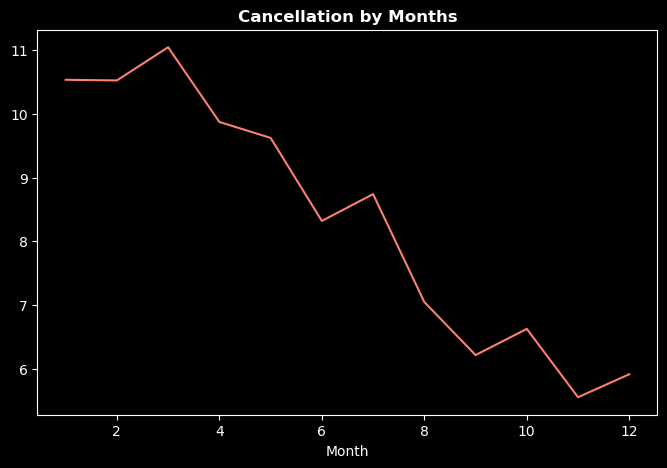

In [38]:
plt.figure(figsize=(8,5))
cancel_month.plot(kind='line',
                  color='salmon')
plt.title('Cancellation by Months',fontweight='bold')
plt.xlabel('Month')
plt.show()

In [39]:
round(cancel_month.head(3).values.sum())

32

Averaging 32% of the guests made the cancellations at the beginning of the year, i.e. January to March.

**What's the relationship between market segments and cancellation rate?**

In [40]:
df['market_segment'].value_counts()

Online TA        51370
Offline TA/TO    13851
Direct           11751
Groups            4921
Corporate         4200
Complementary      688
Aviation           226
Undefined            2
Name: market_segment, dtype: int64

In [41]:
df.groupby('market_segment')['market_segment'].count()

market_segment
Aviation           226
Complementary      688
Corporate         4200
Direct           11751
Groups            4921
Offline TA/TO    13851
Online TA        51370
Undefined            2
Name: market_segment, dtype: int64

In [42]:
# non-free complementary stays
df[(df['market_segment']=='Complementary')&df['adr']!=0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date_year,reservation_status_date_month,reservation_status_date_day
3519,Resort Hotel,1,57,2016,3,12,19,1,1,3,1,0,BB,PRT,Complementary,Direct,0,0,0,C,G,0,No Deposit,0,0,0,Transient,20.0,0,0,Canceled,2016,3,14
4370,Resort Hotel,1,49,2016,5,21,20,0,2,2,1,0,BB,PRT,Complementary,Direct,0,0,0,A,C,1,No Deposit,0,0,0,Transient,17.5,0,0,Canceled,2016,5,16
11732,Resort Hotel,0,8,2015,10,41,7,1,4,1,0,0,SC,PRT,Complementary,Corporate,1,0,2,A,I,2,No Deposit,281,0,0,Contract,2.4,1,2,Check-Out,2015,10,12
13549,Resort Hotel,0,88,2015,10,41,5,1,4,2,0,0,BB,CHN,Complementary,TA/TO,0,0,0,A,C,1,No Deposit,96,0,0,Transient,6.0,1,0,Check-Out,2015,10,10
14281,Resort Hotel,0,0,2015,11,47,15,1,0,2,0,0,BB,PRT,Complementary,Direct,0,0,0,F,F,0,No Deposit,0,0,0,Transient,68.0,0,1,Check-Out,2015,11,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72268,City Hotel,0,32,2016,11,47,15,0,2,2,0,0,BB,DEU,Complementary,Direct,0,0,0,E,E,0,No Deposit,0,0,0,Transient,75.0,0,1,Check-Out,2016,11,17
72842,City Hotel,0,43,2016,11,48,25,0,2,2,1,0,BB,PRT,Complementary,Direct,0,0,0,D,D,1,No Deposit,0,0,0,Transient,20.0,0,2,Check-Out,2016,11,27
72912,City Hotel,0,0,2016,11,49,28,1,1,2,0,0,BB,PRT,Complementary,Direct,0,0,0,A,D,0,No Deposit,0,0,0,Transient,4.5,0,0,Check-Out,2016,11,30
74198,City Hotel,0,304,2016,12,53,29,2,3,1,0,0,BB,SWE,Complementary,TA/TO,0,0,0,A,A,0,No Deposit,12,0,35,Transient-Party,20.0,0,0,Check-Out,2017,1,3


Note that not all complementary bookings are free.

In [43]:
market_adr = df.groupby('market_segment')['adr'].mean()
market_adr

market_segment
Aviation         100.613628
Complementary      3.102573
Corporate         68.344298
Direct           116.950454
Groups            75.184371
Offline TA/TO     81.578454
Online TA        118.401641
Undefined         15.000000
Name: adr, dtype: float64

In [44]:
# cancellation rates in different market segments
market_cancel_rate = round(df.groupby(['market_segment','is_canceled'])['is_canceled'].count()/df.groupby('market_segment')['market_segment'].count()*100,2).unstack().sort_values(1,ascending=False)
market_cancel_rate

is_canceled,0,1
market_segment,,
Undefined,NaN,100.00
Online TA,64.63,35.37
Groups,72.93,27.07
Aviation,80.09,19.91
Offline TA/TO,85.16,14.84
Direct,85.28,14.72
Complementary,87.79,12.21
Corporate,87.88,12.12


In [45]:
fig = px.bar(market_cancel_rate,
             x=market_cancel_rate.index,
             y=[0, 1],
             color_discrete_sequence=['purple', 'salmon'],
             labels={'variable': 'Canceled', 'value': 'Cancellation Rate (%)'},
             title='Cancellation Rates by Market Segment',
             template = 'plotly_dark')

# fig.update_xaxes(type='category')
fig.update_layout(xaxis_title='Market Segment', 
                  yaxis_title='Cancellation Rate',
                  width=600, 
                  height=600)
fig.show()

In [46]:
# look at undefined market segment
df[df['market_segment']=='Undefined']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date_year,reservation_status_date_month,reservation_status_date_day
34227,City Hotel,1,2,2015,8,32,3,1,0,2,0,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,0,0,0,Transient-Party,12.0,0,1,Canceled,2015,8,1
34264,City Hotel,1,1,2015,8,32,5,0,2,3,0,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,0,0,0,Transient-Party,18.0,0,2,Canceled,2015,8,4


Online TA segment has the higher cancellation rate, complementary and corporate segment have the lowest. Undefined only has two records, I will drop this category in one hot encoding

**What's the relationship between meals and cancellation rate?**

In [47]:
df['meal'].value_counts()

BB    67692
SC     9881
HB     9076
FB      360
Name: meal, dtype: int64

In [48]:
meal_cancel = round(df.groupby(['meal','is_canceled'])['is_canceled'].count()/df.groupby('meal')['meal'].count()*100,2).unstack().sort_values(1,ascending=False)
meal_cancel

is_canceled,0,1
meal,,
SC,65.41,34.59
FB,72.50,27.50
HB,73.02,26.98
BB,73.47,26.53


In [49]:
fig = px.bar(meal_cancel,
             x=meal_cancel.index,
             y=[0, 1],
             color_discrete_sequence=['purple', 'salmon'],
             labels={'variable': 'Canceled', 'value': 'Cancellation Rate (%)'},
             title='Cancellation Rates and Meals',
             template = 'plotly_dark')

# fig.update_xaxes(type='category')
fig.update_layout(xaxis_title='Meal', 
                  yaxis_title='Cancellation Rate',
                  width=600, 
                  height=600)
fig.show()

Guests who did not pay for any meals are more likely to cancel their bookings. Other meal plans are indifferent in cancellation rates.

**What's the relationship between distribution channels and cancellation rate?**

In [50]:
df['distribution_channel'].value_counts()

TA/TO        68841
Direct       12920
Corporate     5062
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

In [51]:
distribution_cancel = round(df.groupby(['distribution_channel','is_canceled'])['is_canceled'].count()/df.groupby('distribution_channel')['distribution_channel'].count()*100,2).unstack().sort_values(1,ascending=False)
distribution_cancel

is_canceled,0,1
distribution_channel,,
Undefined,20.00,80.00
TA/TO,69.02,30.98
GDS,80.11,19.89
Direct,85.18,14.82
Corporate,87.24,12.76


In [52]:
fig = px.bar(distribution_cancel,
             x=distribution_cancel.index,
             y=[0, 1],
             color_discrete_sequence=['purple', 'salmon'],
             labels={'variable': 'Canceled', 'value': 'Cancellation Rate (%)'},
             title='Cancellation Rates and Distribution Channel',
             template = 'plotly_dark')

# fig.update_xaxes(type='category')
fig.update_layout(xaxis_title='Distribution Channel', 
                  yaxis_title='Cancellation Rate',
                  width=600, 
                  height=600)
fig.show()

TA/TO has the largest cancellation rate. Undefined only has one booking record, I will drop this category in one-hot encoding.

**What's the relationship between deposit types and cancellation rate?**

In [53]:
df['deposit_type'].value_counts()

No Deposit    85865
Non Refund     1037
Refundable      107
Name: deposit_type, dtype: int64

In [54]:
deposit_cancel = round(df.groupby(['deposit_type','is_canceled'])['is_canceled'].count()/df.groupby('deposit_type')['deposit_type'].count()*100,2).unstack().sort_values(1,ascending=False)
deposit_cancel

is_canceled,0,1
deposit_type,,
Non Refund,5.30,94.70
No Deposit,73.31,26.69
Refundable,75.70,24.30


In [55]:
fig = px.bar(deposit_cancel,
             x=deposit_cancel.index,
             y=[0, 1],
             color_discrete_sequence=['purple', 'salmon'],
             labels={'variable': 'Canceled', 'value': 'Cancellation Rate (%)'},
             title='Cancellation Rates and Deposit Type',
             template = 'plotly_dark')

# fig.update_xaxes(type='category')
fig.update_layout(xaxis_title='Deposit Type', 
                  yaxis_title='Cancellation Rate',
                  width=600, 
                  height=600)
fig.show()

Almost all the guests who paid the price of a room canceled their bookings, this is very strange. Is the data defective? I will explore this feature in conjuction with other features.

In [56]:
# make a table for all the mean values of each numeric features by deposit type
deposit_mean = df.groupby('deposit_type').mean()
deposit_mean

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date_year,reservation_status_date_month,reservation_status_date_day
deposit_type,,,,,,,,,,,,,,,,,,,,,,,,
No Deposit,0.266919,78.190404,2016.211856,6.475514,26.835824,15.801502,1.008001,2.630816,1.886182,0.135760,0.010982,0.032458,0.026821,0.185105,0.269842,81.573889,0.059267,0.615734,106.788572,0.085378,0.706994,2016.192220,6.264415,15.771921
Non Refund,0.946962,211.474446,2016.090646,6.595950,27.358727,16.049180,0.730955,2.039537,1.712633,0.008679,0.000000,0.003857,0.334619,0.149470,0.084860,58.218901,0.081003,11.018322,87.269836,0.000964,0.016393,2015.768563,6.541948,15.589200
Refundable,0.242991,145.392523,2016.177570,4.971963,21.411215,22.981308,0.943925,2.813084,1.869159,0.046729,0.000000,0.018692,0.000000,0.028037,0.747664,60.242991,0.579439,7.504673,79.928318,0.186916,0.196262,2016.140187,5.626168,11.112150


- Non-refundable bookings have much longer lead time than other deposit types
- Guests who paid non-refund deposit planned to stay for a shorter time in average
- Guests who paid non-refund deposit are less likely to be a repeated guests, but have more previous cancellations
- They have less booking changes
- Almost no parking spaces required
- Almost no special requests

Indeed, this feature could be defective, and I will try fit the models without this feature first.

**What's the relationship between customer types and cancellation rate?**

In [57]:
df['customer_type'].value_counts()

Transient          71725
Transient-Party    11610
Contract            3134
Group                540
Name: customer_type, dtype: int64

In [58]:
customer_cancel = round(df.groupby(['customer_type','is_canceled'])['is_canceled'].count()/df.groupby('customer_type')['customer_type'].count()*100,2).unstack().sort_values(1,ascending=False)
customer_cancel

is_canceled,0,1
customer_type,,
Transient,69.88,30.12
Contract,83.66,16.34
Transient-Party,84.85,15.15
Group,90.19,9.81


In [59]:
fig = px.bar(customer_cancel,
             x=customer_cancel.index,
             y=[0, 1],
             color_discrete_sequence=['purple', 'salmon'],
             labels={'variable': 'Canceled', 'value': 'Cancellation Rate (%)'},
             title='Cancellation Rates and Customer Type',
             template = 'plotly_dark')

# fig.update_xaxes(type='category')
fig.update_layout(xaxis_title='Customer Type', 
                  yaxis_title='Cancellation Rate',
                  width=600, 
                  height=600)
fig.show()

Transient guests are more likely to cancel their bookings. Let's explore deeper with the cancellation rate and each customer type like in different months?

In [60]:
# resort hotel cancellation rate of each customer type by month
customer_cancel_monthly_resort = round(resort_hotel.groupby(['reservation_status_date_month','customer_type'])['is_canceled'].sum()/resort_hotel.groupby('reservation_status_date_month')['reservation_status_date_month'].count()*100,2)

# put the groupby into a data frame
customer_cancel_monthly_resort = pd.DataFrame(customer_cancel_monthly_resort).reset_index()

# rename the last column
customer_cancel_monthly_resort.rename(columns={0:'Cancellation Rate'},inplace=True)

customer_cancel_monthly_resort

,reservation_status_date_month,customer_type,Cancellation Rate
0,1,Contract,0.39
1,1,Group,0.58
2,1,Transient,26.04
3,1,Transient-Party,2.55
4,2,Contract,0.61
5,2,Group,0.00
6,2,Transient,25.59
7,2,Transient-Party,2.20
8,3,Contract,0.61
9,3,Group,0.00


In [61]:
# city hotel cancellation rate of each customer type by month
customer_cancel_monthly_city = round(city_hotel.groupby(['reservation_status_date_month','customer_type'])['is_canceled'].sum()/city_hotel.groupby('reservation_status_date_month')['reservation_status_date_month'].count()*100,2)

# put the groupby into a data frame
customer_cancel_monthly_city = pd.DataFrame(customer_cancel_monthly_city).reset_index()

# rename the last column
customer_cancel_monthly_city.rename(columns={0:'Cancellation Rate'},inplace=True)

customer_cancel_monthly_city

,reservation_status_date_month,customer_type,Cancellation Rate
0,1,Contract,1.19
1,1,Group,0.00
2,1,Transient,41.25
3,1,Transient-Party,1.99
4,2,Contract,0.24
5,2,Group,0.07
6,2,Transient,38.70
7,2,Transient-Party,2.50
8,3,Contract,0.12
9,3,Group,0.00


In [62]:
# plot
fig = px.line(customer_cancel_monthly_city,
             x='reservation_status_date_month',
             y='Cancellation Rate',
             color='customer_type',
             labels={'customer_type':'Customer Type','reservation_status_date_month': 'Month', 'value': 'Cancellation Rate (%)'},
             title='Cancellation Rate and Customer Type by Month (City Hotel)',
             template = 'plotly_dark')

fig.update_layout(xaxis_title='Month', 
                  yaxis_title='Cancellation Rate',
                  width=600, 
                  height=600)
fig.show()

In [63]:
# plot
fig = px.line(customer_cancel_monthly_resort,
             x='reservation_status_date_month',
             y='Cancellation Rate',
             color='customer_type',
             labels={'customer_type':'Customer Type','reservation_status_date_month': 'Month', 'value': 'Cancellation Rate (%)'},
             title='Cancellation Rate and Customer Type by Month (Resort Hotel)',
             template = 'plotly_dark')

fig.update_layout(xaxis_title='Month', 
                  yaxis_title='Cancellation Rate',
                  width=600, 
                  height=600)
fig.show()

The two plots of cancellations between two hotels are quite different:
- **City hotel**: 
    - *Transient*: The cancellation rate significantly decreases from 41% in January to 16% August, then increases back up from September.
    - *Transient Party*: The cancellation rate maintains its stability, expect a small surge in July.
    - *Contract*: The cancellation rate is close to 0%, apart from January, September, October, and Novembr, there is increase in cancellation rate.
    - *Group*: The cancellation rate stays around 0 all year around.
- **Resort hotel**:
    - *Transient*: The cancellation rate exhibits a decline from January's peak of 33% to 22% in May. However, it experiences a sudden resurgence, returning to 33% in June. Subsequently, there is a decline to the lowest point of 16% in August, followed by an ascent, reaching 25% in December.
    - *Transient Party*: The cancellation at the resort hotel is relatively stable around 5%, however there is a gradual decrease from March to June, hits a minimum at 1.6%. The it gradually increase back up to 5% from June to December.
    - *Contract*: The cancellation rate stays around 0 all year around.
    - *Group*: The cancellation rate stays around 0 all year around.

**What's the relationship between agents and cancellation rate?**

In [64]:
# need to convert the data type to string for plotly to work
df['agent'] = df['agent'].astype(str)

In [65]:
df['agent'].value_counts()

9      28546
240    13028
0      12124
14      3326
7       3290
       ...  
59         1
451        1
472        1
70         1
449        1
Name: agent, Length: 334, dtype: int64

In [66]:
# cancellation rates of top 10 agents
cancel_rate_agent = round(df.groupby(['agent','is_canceled'])['agent'].count()/df.groupby(['agent'])['agent'].count()*100,2).unstack()
cancel_rate_agent['Number of Bookings'] = df['agent'].value_counts()
cancel_rate_agent = cancel_rate_agent.sort_values('Number of Bookings',ascending=False).head(10)
cancel_rate_agent

is_canceled,0,1,Number of Bookings
agent,,,
9,59.88,40.12,28546
240,62.05,37.95,13028
0,87.26,12.74,12124
14,82.59,17.41,3326
7,86.78,13.22,3290
250,82.22,17.78,2779
241,86.74,13.26,1644
28,94.17,5.83,1493
8,72.25,27.75,1380


In [102]:
# plot
fig = px.bar(cancel_rate_agent.sort_values(1,ascending=False),
             y=cancel_rate_agent.index, 
             x=[0,1],
             labels={'variable':'Canceled','value':'Cancellation Rate (%)'},
             barmode='group',
             orientation='h',
             color_discrete_sequence=['purple','salmon'],
             title='Cancellation Rate of Top 10 Agents',
             template='plotly_dark')

fig.update_layout(xaxis_title='Cancellation Rate', 
                  yaxis_title='Agent',
                  width=600,
                  height=600)

fig.show()

In [68]:
# convert back to int
df['agent'] = df['agent'].astype(int)

Different agents could have varying levels of influence on whether bookings get canceled, then the agent feature is informative. For example, agent 28 have a higher success rate in retaining bookings, making them a potential predictor. I will encode this feature, however it will increase model complexity.

**Are bookings paid by company more likely to be canceled?**

In [69]:
df['company'].value_counts()

0    81774
1     5235
Name: company, dtype: int64

In [70]:
cancel_rate_company = round(df.groupby(['company','is_canceled'])['company'].count()/df.groupby(['company'])['company'].count()*100,2).unstack().sort_values(1,ascending=False)
cancel_rate_company

is_canceled,0,1
company,,
0,71.43,28.57
1,89.15,10.85


In [71]:
# Reshape the DataFrame
cancel_rate_company = cancel_rate_company.reset_index()
cancel_rate_company_melted = pd.melt(cancel_rate_company, id_vars=['company'], value_vars=[0, 1], 
                                      var_name='is_canceled', value_name='cancellation_rate')

# Create the bar plot
fig = px.bar(cancel_rate_company_melted,
             x='company',  # Companies on the x-axis
             y='cancellation_rate',  # Cancellation rate on the y-axis
             color='is_canceled',
             color_discrete_sequence=['purple', 'salmon'],
             labels={'is_canceled': 'Canceled', 'cancellation_rate': 'Cancellation Rate (%)'},
             title='Cancellation Rates by Company',
             template='plotly_dark')

fig.update_layout(xaxis_title='Company',
                  yaxis_title='Cancellation Rate (%)',
                  width=600,
                  height=600)

fig.show()

Looks like bookings which are paid by a company are less likely to be canceled.

# Numerical Features

**What's the relationship between parking spaces and cancellationo rate?**

In [72]:
df['required_car_parking_spaces'].value_counts()

0    79705
1     7271
2       28
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

The majority of the guests did not required a parking.

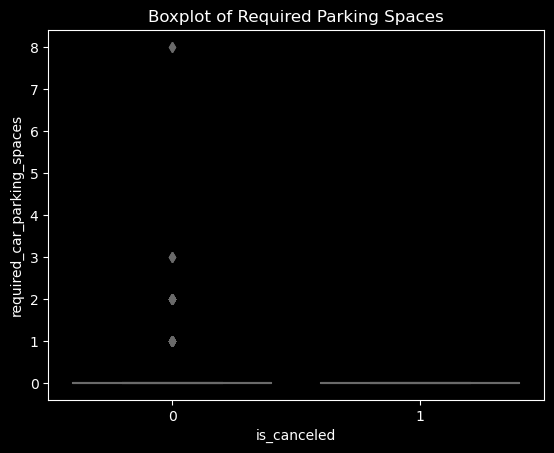

In [73]:
# plot the boxplots of parking spaces
sns.boxplot(df,
            x='is_canceled',
            y='required_car_parking_spaces')
plt.title('Boxplot of Required Parking Spaces')
plt.show()

Since the data is heavily clustered at 0, it is not very clear, but we can still see, all the bookings that are canceled have 0 parking spaces required. Because this feature is very skewed at 0, I will make it binary in the preprocessing step.

**What does lead time contribute to cancellation rate?**

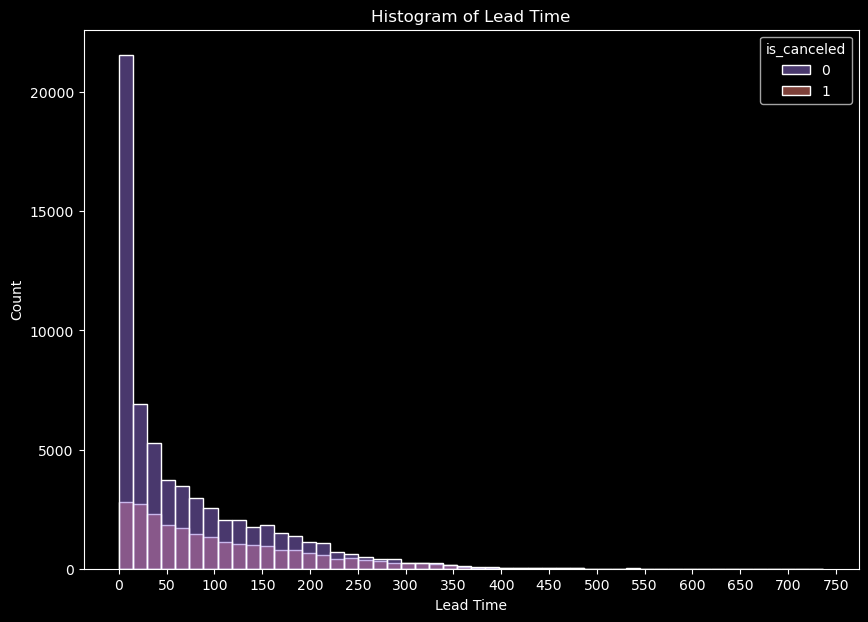

In [74]:
plt.figure(figsize=(10,7))

ax = sns.histplot(df,
             x='lead_time',
             hue='is_canceled',
             palette=['mediumpurple','salmon'],
             bins=50)

# Set tick positions every 50 units
ax.xaxis.set_major_locator(MultipleLocator(base=50))  

plt.title('Histogram of Lead Time')
plt.xlabel('Lead Time')
plt.show()

In a lower range of lead_time, from 0 to 200 days, there are more guests who did not cancel their bookings, especially those who booked the hotel just a few days before check-in (lead time around 0). After 250 days, we begin to see rise in the number of canceled bookings.

**How does daily rate affect cancellation rate?**

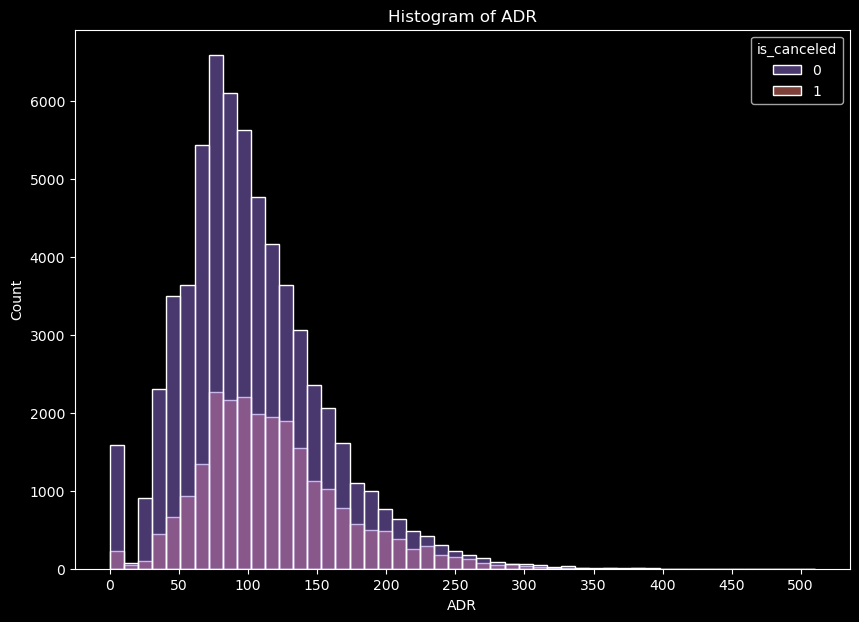

In [75]:
plt.figure(figsize=(10,7))

ax = sns.histplot(df,
             x='adr',
             hue='is_canceled',
             palette=['mediumpurple','salmon'],
             bins=50)

# Set tick positions every 50 units
ax.xaxis.set_major_locator(MultipleLocator(base=50))  

plt.title('Histogram of ADR')
plt.xlabel('ADR')
plt.show()

In [76]:
# get cancellation rate around 60
print('Cancellation rate around 60 adr:')
print(round(df[(df['adr']>=60) & (df['adr']<61)]['is_canceled'].value_counts()/len(df[(df['adr']>=60) & (df['adr']<61)])*100,2))

Cancellation rate around 60 adr:
0    79.0
1    21.0
Name: is_canceled, dtype: float64


The daily rate (ADR) distributions between the two groups exhibit a notable similarity, resembling a right-skewed normal distribution. Notably, around the ADR mark of 100, the frequency of non-canceled bookings predominates; however, at an ADR of approximately 60, there's a marked escalation in the cancellation rate. Additionally, as the ADR surpasses 100, the count of cancellations begins to exceed that of confirmed bookings. This particular feature holds substantial potential to provide valuable information for our models.

**What's the relationship between cancellation and previous cancellations?**

In [77]:
df['previous_cancellations'].value_counts()

0     85330
1      1403
2       110
3        61
4        30
11       27
5        19
6        17
13        4
25        2
24        2
26        1
14        1
19        1
21        1
Name: previous_cancellations, dtype: int64

This feature is also very sparse, with a heavy concentratio on 0. Let's take a look at its relationship with cancellations.

In [78]:
# get the cancellation rate grouped by numeber of previous cancellations
round(df.groupby(['previous_cancellations','is_canceled'])['previous_cancellations'].count()/df.groupby(['previous_cancellations'])['previous_cancellations'].count()*100,2).unstack().sort_values(1,ascending=False)

is_canceled,0,1
previous_cancellations,,
14,NaN,100.00
19,NaN,100.00
21,NaN,100.00
24,NaN,100.00
25,NaN,100.00
26,NaN,100.00
1,23.88,76.12
13,25.00,75.00
2,69.09,30.91


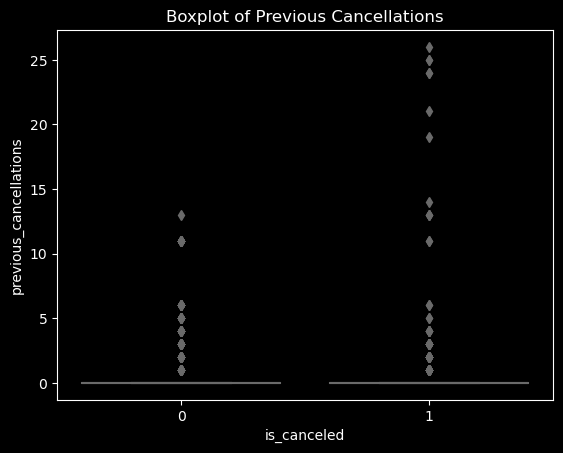

In [79]:
# plot the boxplots of previous_cancellations
sns.boxplot(df,
            x='is_canceled',
            y='previous_cancellations')
plt.title('Boxplot of Previous Cancellations')
plt.show()

It's obvious that guests who previously canceled more than 13 times have a 100% tendency to cancel their bookings. But It is a good idea to use binning technique for this feature, as it can help capture patterns across different ranges and reduce the impact of the heavy concentration at 0.

**What's the relationship between cancellation and preivous bookings not canceled?**

In [80]:
df['previous_bookings_not_canceled'].value_counts()

0     83473
1      1477
2       579
3       331
4       228
      ...  
47        1
49        1
50        1
51        1
72        1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64

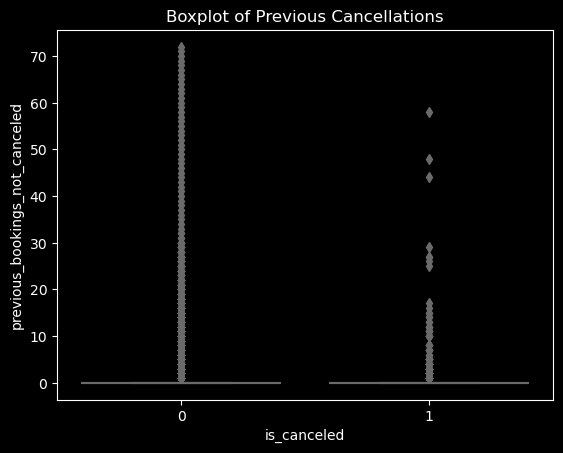

In [81]:
# plot the boxplots of previous_cancellations
sns.boxplot(df,
            x='is_canceled',
            y='previous_bookings_not_canceled')
plt.title('Boxplot of Previous Cancellations')
plt.show()

In [82]:
# get the cancellation rate grouped by numeber of previous cancellations
round(df.groupby(['previous_bookings_not_canceled','is_canceled'])['previous_bookings_not_canceled'].count()/df.groupby(['previous_bookings_not_canceled'])['previous_bookings_not_canceled'].count()*100,2).unstack().sort_values(1,ascending=False)

is_canceled,0,1
previous_bookings_not_canceled,,
58,50.00,50.00
44,50.00,50.00
48,50.00,50.00
0,71.55,28.45
27,77.78,22.22
...,...,...
68,100.00,NaN
69,100.00,NaN
70,100.00,NaN


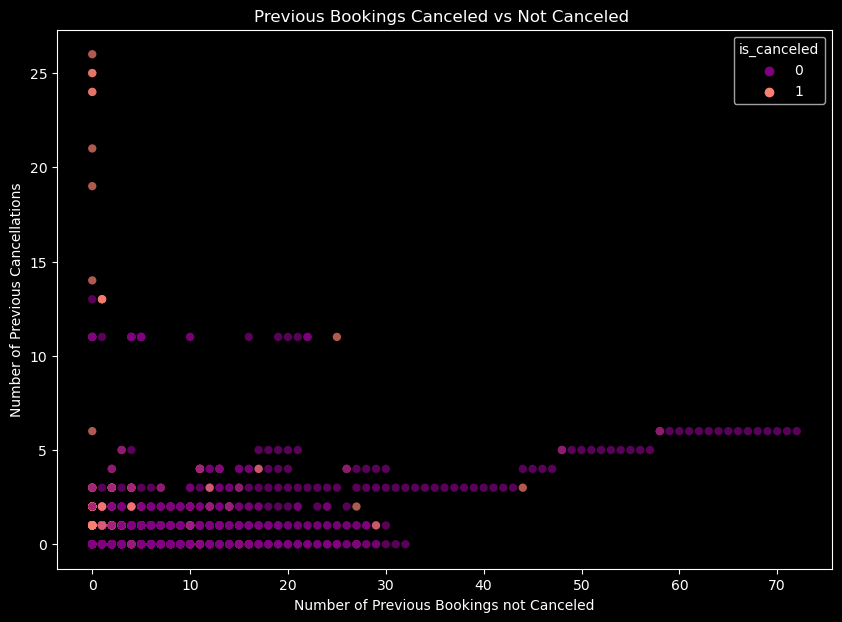

In [83]:
plt.figure(figsize=(10,7))

sns.scatterplot(df,
                x='previous_bookings_not_canceled',
                y='previous_cancellations',
                hue='is_canceled',
                palette=['purple','salmon'],
                edgecolor='none',
                alpha=0.7)

plt.title('Previous Bookings Canceled vs Not Canceled ')
plt.xlabel('Number of Previous Bookings not Canceled')
plt.ylabel('Number of Previous Cancellations')

plt.show()

Generally speaking, guests who canceled had less non-canceled previous bookings and much more historical cancellations.

In [84]:
# previously canceled at this hotel
df[(df['is_repeated_guest']==1) & (df['previous_cancellations']!=0)]['is_canceled'].value_counts()/len(df[(df['is_repeated_guest']==1) & (df['previous_cancellations']!=0)])

0    0.833962
1    0.166038
Name: is_canceled, dtype: float64

In [85]:
df[(df['is_repeated_guest']==0) & (df['previous_cancellations']!=0)]['is_canceled'].value_counts()/len(df[(df['is_repeated_guest']==0) & (df['previous_cancellations']!=0)])

1    0.916449
0    0.083551
Name: is_canceled, dtype: float64

Guests who booked and but canceled their bookings at the same hotel have a 83% chance of cancelling again. Guests who had previous cancellations but booked and stayed at the hotel less likely to cancel.

**Adults, children, babies**

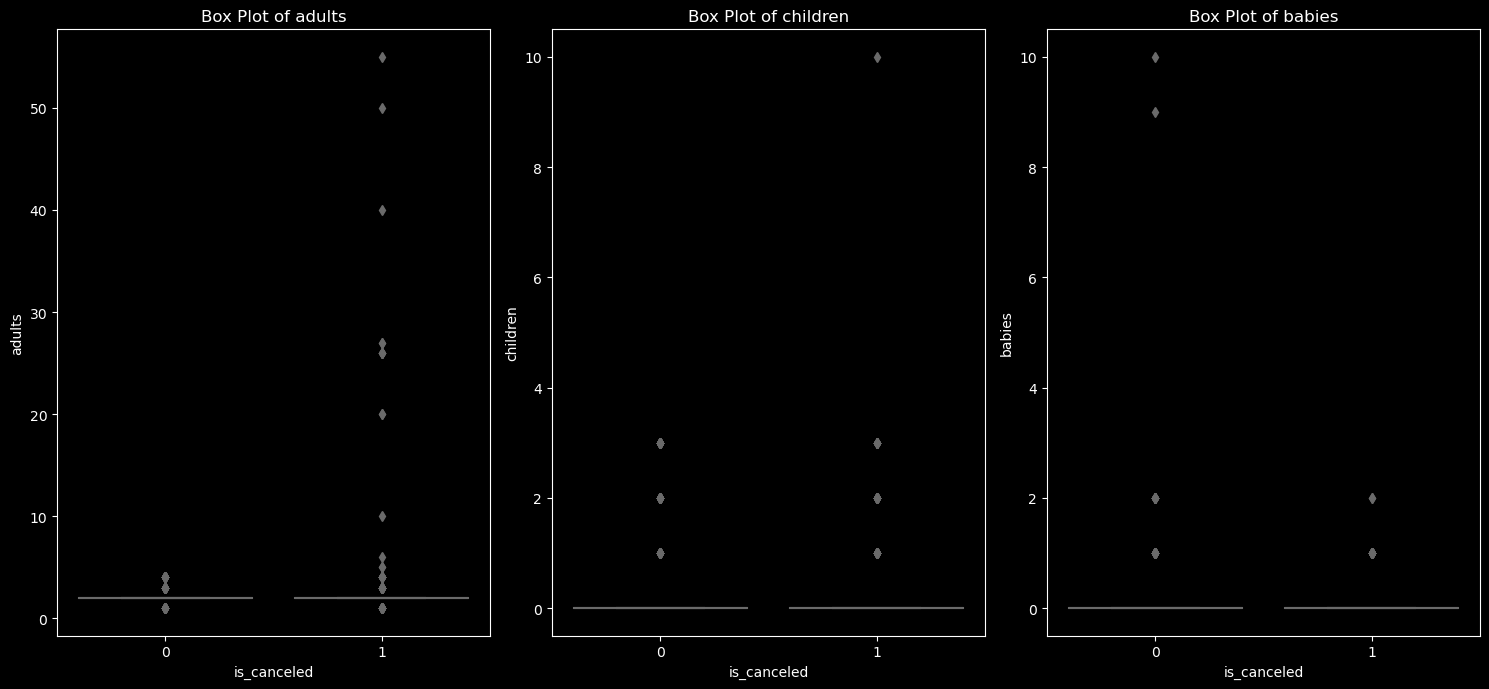

In [86]:
# plot the boxplots of adults, children, babies

plt.subplots(1,3,figsize=(15,7))

guests_cols = ['adults','children','babies']

for i,col in enumerate(guests_cols):

    plt.subplot(1,3,i+1)
    
    sns.boxplot(df,
                x='is_canceled',
                y=col)
    plt.title(f'Box Plot of {col}')
    plt.xlabel('is_canceled')
    plt.ylabel(col)
    
plt.tight_layout()
plt.show()

Looks like only adults are related to our target variable, canceled bookings tend to have more adults. Children and babies columns are indifferent between two groups. Let's explore the cancellation rates of family guests and single guests, and decide if these three columns are to be excluded from my models.

In [87]:
# get single guests
single = ((df['adults']==1) & (df['children'] + df['babies']==0))
single_df = df[single]

# cancellation rate of single guests
cancel_single = round(single_df.groupby(['is_canceled'])['is_canceled'].count()/len(single_df)*100,2)

# cancellation rate of non-single guests
cancel_non_single = round(df[~single].groupby(['is_canceled'])['is_canceled'].count()/len(df[~single])*100,2)

In [88]:
# creat a data frame
single_nonsingle_df = pd.DataFrame({'Single': cancel_single,'Non-single': cancel_non_single}).T
single_nonsingle_df

is_canceled,0,1
Single,80.74,19.26
Non-single,70.63,29.37


In [89]:
# plot
fig = px.bar(single_nonsingle_df,
             x=single_nonsingle_df.index, 
             y=[0,1],
             color_discrete_sequence=['purple', 'salmon'],
             labels={'variable': 'is_canceled', 'cancellation_rate': 'Cancellation Rate (%)'},
             title='Cancellation Rate: Single vs Non-single',
             template='plotly_dark')

fig.update_layout(xaxis_title='',
                  yaxis_title='Cancellation Rate (%)',
                  width=600,
                  height=600)

fig.show()

In [90]:
# get family
family = ((df['adults']>=2) & (df['children']>=1)) | ((df['adults']>=2) & (df['babies']>=1))
family_df = df[family]

# calculate the cancellaton rate of family vs non-family guests
cancel_family = round(family_df.groupby(['is_canceled'])['is_canceled'].count()/len(family_df)*100,2)
cancel_non_family = round(df[~family].groupby(['is_canceled'])['is_canceled'].count()/len(df[~family])*100,2)

# creat a data frame
family_nonfamily_df = pd.DataFrame({'Family': cancel_family,'Non-family': cancel_non_family}).T
family_nonfamily_df

is_canceled,0,1
Family,65.42,34.58
Non-family,73.26,26.74


In [91]:
# plot
fig = px.bar(family_nonfamily_df,
             x=family_nonfamily_df.index, 
             y=[0,1],
             color_discrete_sequence=['purple', 'salmon'],
             labels={'variable': 'is_canceled', 'cancellation_rate': 'Cancellation Rate (%)'},
             title='Cancellation Rate: Family vs Non-family',
             template='plotly_dark')

fig.update_layout(xaxis_title='',
                  yaxis_title='Cancellation Rate (%)',
                  width=600,
                  height=600)

fig.show()

There is a 7.84%% difference in the cancellation rates for the family and non-family group. On the other hand, there is a 10% cancellation rate different between single guests and non-single guests, for a data set is large as this one. A 10% difference might be more statistically significant in a large dataset compared to a small one. I will try to combine `children` and `babies` together, as doing so is likely to provide the models with more informative values, as illustrated.

**Bookings changes and cancellations**

In [92]:
df['booking_changes'].value_counts()

0     71262
1     10823
2      3476
3       858
4       347
5       112
6        57
7        28
8        14
9         8
10        6
13        5
14        3
15        3
17        2
16        2
12        1
18        1
11        1
Name: booking_changes, dtype: int64

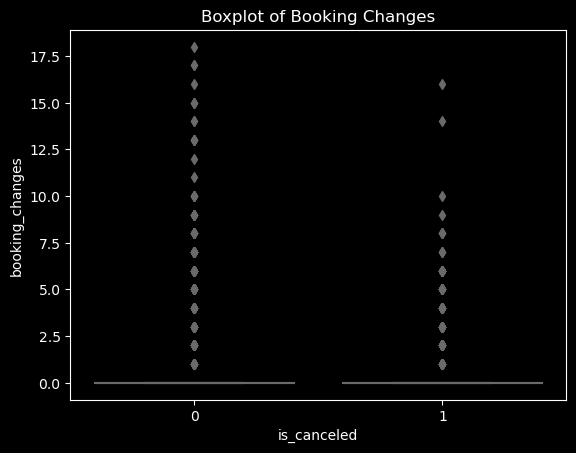

In [93]:
sns.boxplot(df,
            x='is_canceled',
            y='booking_changes')
plt.title('Boxplot of Booking Changes')
plt.show()

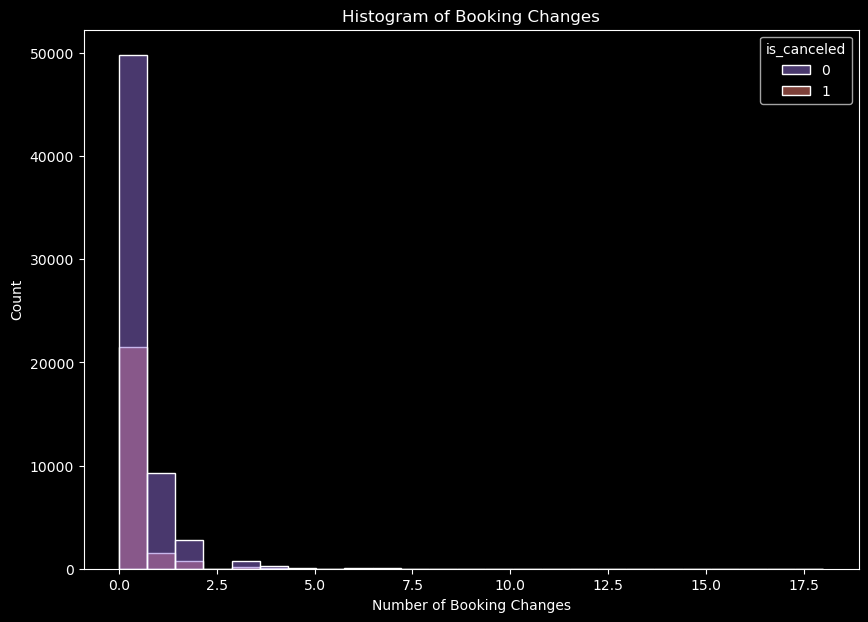

In [94]:
# look at the distribution
plt.figure(figsize=(10,7))

ax = sns.histplot(df,
             x='booking_changes',
             hue='is_canceled',
             palette=['mediumpurple','salmon'],
             bins=25)

plt.title('Histogram of Booking Changes')
plt.xlabel('Number of Booking Changes')
plt.show()

Canceled bookings have less bookings changes than confirmed bookings. I will try to binarize this feature.

**Special requests and cancellations**

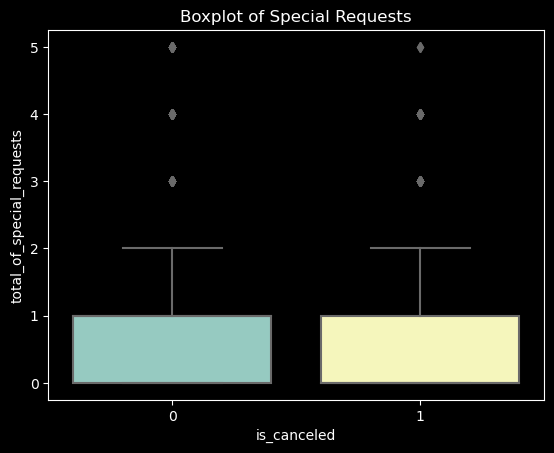

In [95]:
sns.boxplot(df,
            x='is_canceled',
            y='total_of_special_requests')
plt.title('Boxplot of Special Requests')
plt.show()

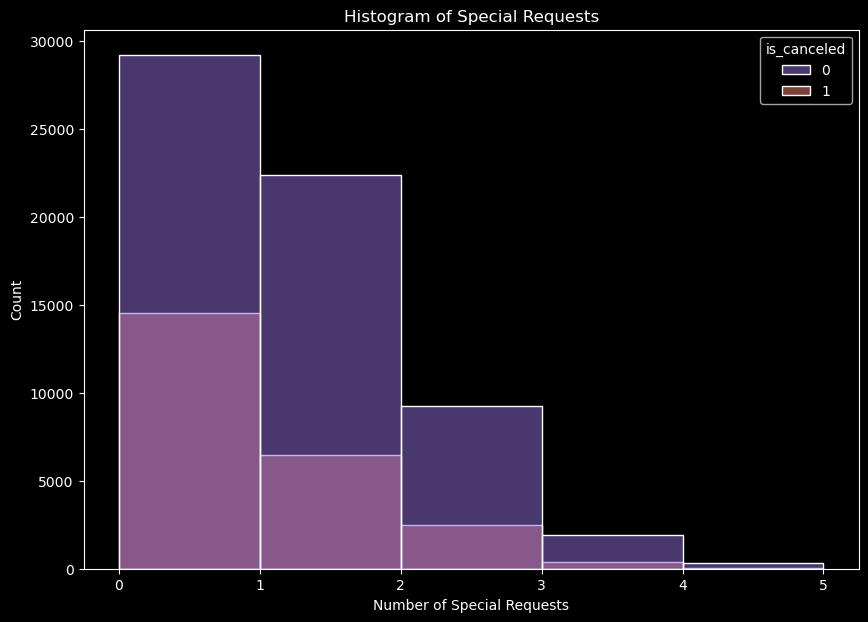

In [96]:
# look at the distribution
plt.figure(figsize=(10,7))

ax = sns.histplot(df,
             x='total_of_special_requests',
             hue='is_canceled',
             palette=['mediumpurple','salmon'],
             bins=5)

plt.title('Histogram of Special Requests')
plt.xlabel('Number of Special Requests')
plt.show()

In [97]:
df['total_of_special_requests'].value_counts()

0    43720
1    28878
2    11757
3     2300
4      318
5       36
Name: total_of_special_requests, dtype: int64

Guests who did not cancel their bookings tend to make more special requests to the hotel. However, this feature is heavily clustered at 0, the majority of canceled bookings made no special requests. Whereas there are more non-canceled bookings with more than 0 special requests. I will consider binarizing this feature, because this is enough to capture the pattern in this feature.

**Days in waiting list and cancellations**

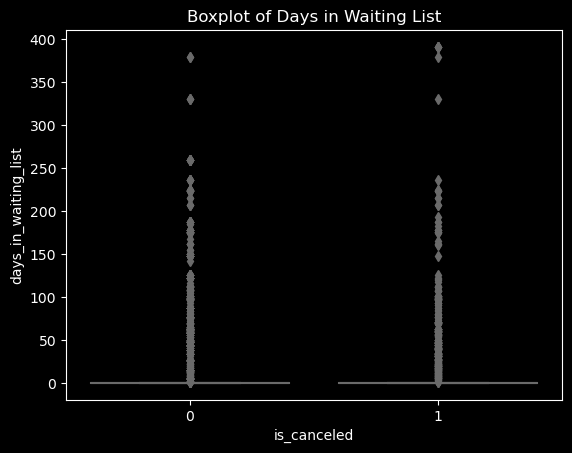

In [98]:
sns.boxplot(df,
            x='is_canceled',
            y='days_in_waiting_list')
plt.title('Boxplot of Days in Waiting List')
plt.show()

There is a heavy cluster of data at 0, and there is no notable patterns in terms of cancellation rate difference. Let's explore deeper.

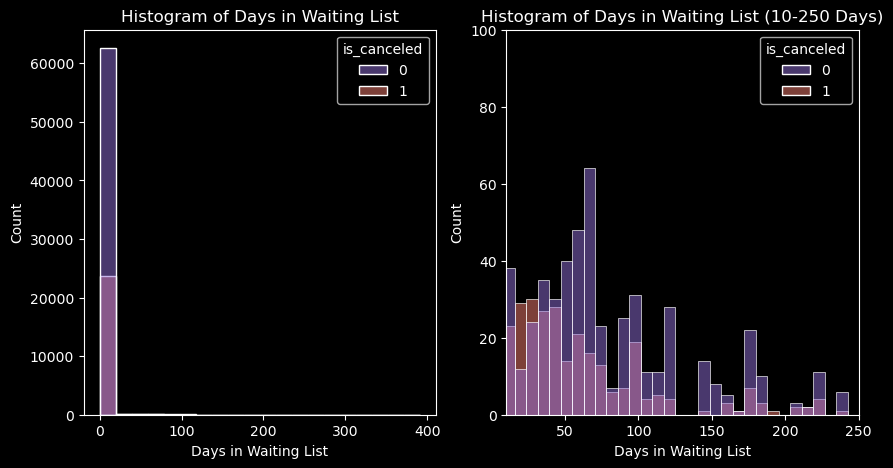

In [99]:
# look at the distribution

plt.subplots(1,2,figsize=(10,5))

plt.subplot(1,2,1)
sns.histplot(df,
             x='days_in_waiting_list',
             hue='is_canceled',
             palette=['mediumpurple','salmon'],
             bins=20)

plt.title('Histogram of Days in Waiting List')
plt.xlabel('Days in Waiting List')

plt.subplot(1,2,2)
sns.histplot(df,
             x='days_in_waiting_list',
             hue='is_canceled',
             palette=['mediumpurple','salmon'],
             bins=50)

plt.title('Histogram of Days in Waiting List (10-250 Days)')
plt.xlabel('Days in Waiting List')
plt.xlim(10,250)
plt.ylim(0,100)

plt.show()

Because the data is highly concentrated at 0, I cannot see the pattern in the range of large number, so I plot another histogram shows the distribution of the bookings with 5 to 250 days in waiting list.

It seems that guests tend to cancel more if they spent from 5 days to 50 days to book the hotel, but if they waited longer than 50 days, they do not show any pattern in their tendency of cancelling a booking..

**Stays in weekend nights and week nights**

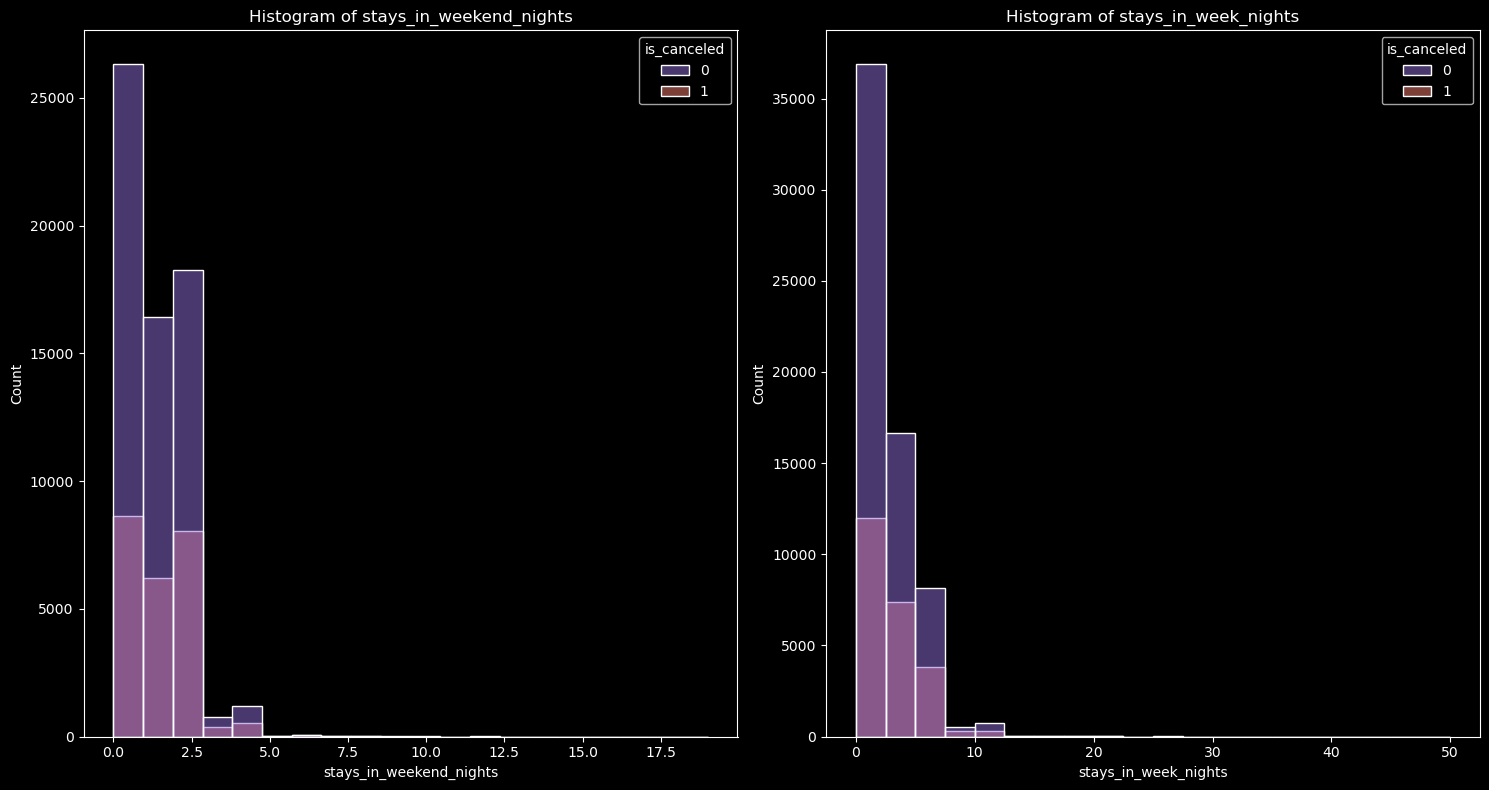

In [100]:
plt.subplots(1,2,figsize=(15,8))

for i,col in enumerate(['stays_in_weekend_nights','stays_in_week_nights']):
    
    plt.subplot(1,2,i+1)
    sns.histplot(df,
                 x=col,
                 hue='is_canceled',
                 palette=['mediumpurple','salmon'],
                 bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

The distributions of both stays in weekend nights and stays in week nights are almost identical for both groups. I will consider dropping these two features from the models.

# Conclusion

**EDA Key Insights**
- Guests from `Portugal` have the highest cancellation rate among the top 20 most common countries
- Cancellation rates across all reserved room types are somewhat consistent, but varying among the assigned room types. 
- The demand of hotels is highest during summer time, followed by `May` and `October`. 
- Average daily rate of a room in the resort hotel is most expensive in `August`, a city hotel room costs the most in `May`.
- `January` has the highest cancellation rate, followed by `July` and `October`. Whereas `August` and `September` have the lowest cancellation rate.
- `Online TA` segment has the highest cancellation rate. `Complementary` and `corporate` bookings have the lowest cancellation rate.
- `TA/TO` distribution channel has higher cancellation rate.
- `Transient` guests are inclined to cancel their reservations at city hotels during the `winter` and `spring` seasons. Additionally, these transient guests tend to cancel their bookings at resort hotels particularly in `June`. On the other hand, guests classified as `transient party` are more prone to cancelling their city hotel reservations, with spring being the more noticable season. Lastly, guests with a `contract` arrangement exhibit a tendency to cancel their city hotel bookings, `September`, ` October`, and `December` standing out as a prominent month for such cancellations.
- Guests who paid `non-refundable` deposit are more likely to cancel. For the following reasons: 1. They tend to stay for a shorter time, short trip plans have a higher tendency to change; 2. They have more previous cancellations, maybe the hotel has already reinforced a non-refundable deposit policy on them; 3. They  have a much longer lead time, as we see longer lead time potentially lead to more cancellations.
- Among the top 20 most popular travel agents, agents with the code `9`, `240`, `14`, `7` have more cancellations than confirmed bookings.
- Bookings paid by a `company` are less likely to be canceled.
- All the bookings that are canceled have 0 `parking spaces` required.
- In a lower range of `lead_time`, from 0 to 200 days, there are more guests who did not cancel their bookings, especially those who booked the hotel just a few days before check-in (lead time around 0). After 250 days, we begin to see rise in the number of canceled bookings.
- Guests who `previously canceled` more than 13 times have a 100% tendency to cancel their bookings. And guests who canceled had less non-canceled previous bookings and much more historical cancellations.
- Canceled bookings tend to have more `adults`. Children and babies columns are indifferent between two groups.
- Guests who did not cancel their bookings tend to make more `special requests` to the hotel.

**Features to be dealt with**
- *Features to be engineered*: `'previous_bookings_not_canceled', 'previous_cancellations', 'lead_time', 'required_car_parking_spaces', 'booking_changes', 'total_of_special_requests', 'arrival_date_month', 'children', 'babies'`
- *Features has low relevance*: `'arrival_date_year', 'arrival_date_day_of_month', 'reserved_room_type', 'meal', 'days_in_waiting_list', 'stays_in_weekend_nights', 'stays_in_week_nights'`